In [1]:
pip install scikit-learn==1.4.1.post1


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np # linear algebra
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#C:\Users\Lawter\Desktop\postgrace\Homabay_Milk_Data.csv
os.chdir('C:/Users/Lawter/Desktop/postgrace')
df = pd.read_csv('Homabay_Milk_Data.csv')
#C:/Users/WALTER MUGENDI/Desktop/finalcopy/Flask/decision tree\Homabay_Milk_Data.csv

In [3]:
df.dtypes

Area                                         object
Cow_Breed                                    object
No_of_Calves                                  int64
Litres_of_water_Taken_by_the_cow_in_a_day     int64
Feeding_Practices                            object
Average_Temperature_of_the_Area               int64
Yearly_Production                             int64
dtype: object

In [4]:
df.shape

(10000, 7)

In [6]:
df.head(5)

,Area,Cow_Breed,No_of_Calves,Litres_of_water_Taken_by_the_cow_in_a_day,Feeding_Practices,Average_Temperature_of_the_Area,Yearly_Production
0,Rachuonyo North,Guernsey,3,104,Zero-grazing,25,8605
1,Suba North,Jersey,5,76,Grazing,25,7442
2,Rachuonyo North,Ayrshire,1,53,Grazing,20,7886
3,Suba South,Brown Swiss,2,120,Grazing,30,10964
4,Rachuonyo South,Ayrshire,3,89,Mixed,27,11838


In [7]:
##%%
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Area                                       10000 non-null  object
 1   Cow_Breed                                  10000 non-null  object
 2   No_of_Calves                               10000 non-null  int64 
 3   Litres_of_water_Taken_by_the_cow_in_a_day  10000 non-null  int64 
 4   Feeding_Practices                          10000 non-null  object
 5   Average_Temperature_of_the_Area            10000 non-null  int64 
 6   Yearly_Production                          10000 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 547.0+ KB


In [8]:
##%%
df.isnull().sum()

Area                                         0
Cow_Breed                                    0
No_of_Calves                                 0
Litres_of_water_Taken_by_the_cow_in_a_day    0
Feeding_Practices                            0
Average_Temperature_of_the_Area              0
Yearly_Production                            0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
##%%
len(df['Area'].unique())

7

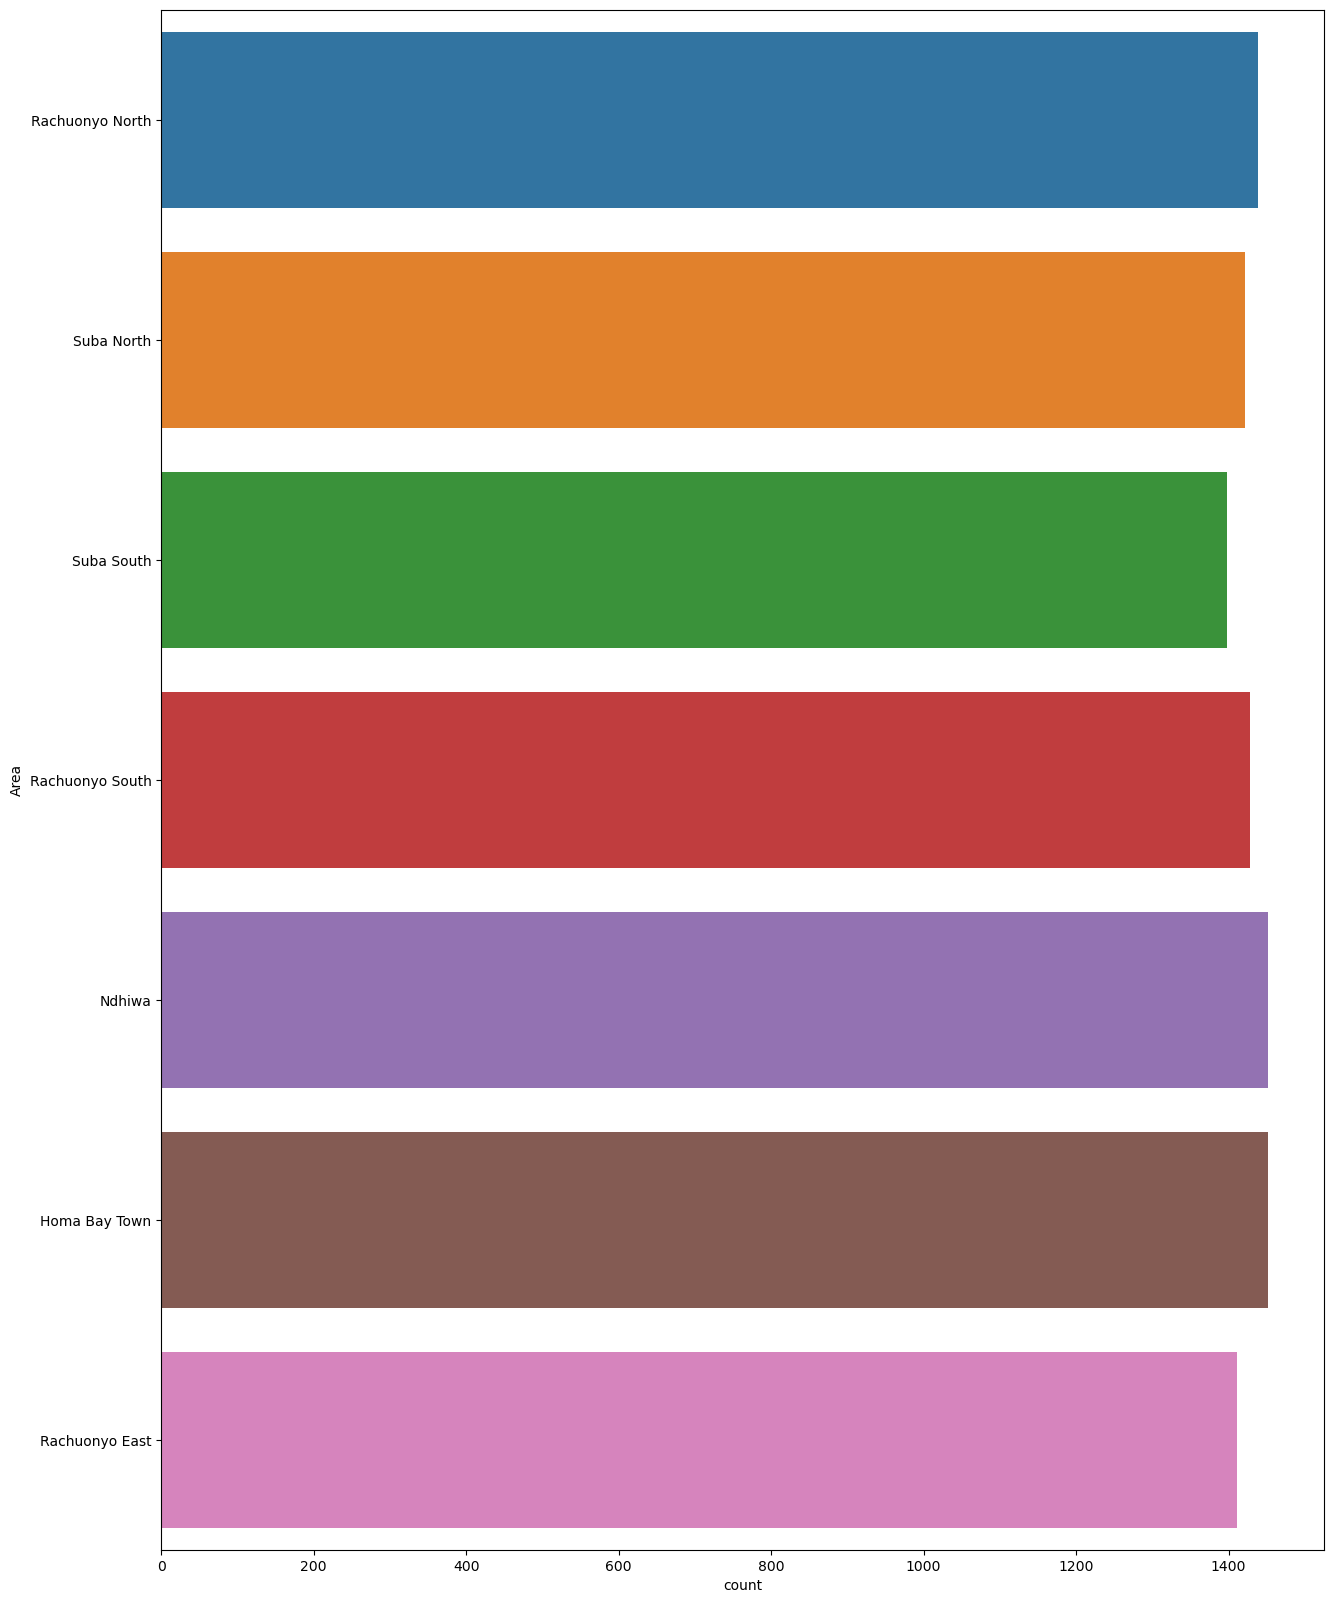

In [13]:
plt.figure(figsize=(15,20))
sns.countplot(y=df['Area'])
plt.savefig('dataanalysis/Areapng121.png')
plt.show()


In [14]:
(df['Area'].value_counts() > 500).sum()

7

# ***YIELD PER AREA***

---

# New Section

In [15]:
area = df['Area'].unique()
yield_per_area = []
for state in area:
    yield_per_area.append(df[df['Area']==state]['Yearly_Production'].sum())

In [16]:
df['Yearly_Production'].sum()

77016083

In [17]:
yield_per_area

[11057427, 10957727, 10771013, 10994465, 11218430, 11119980, 10897041]

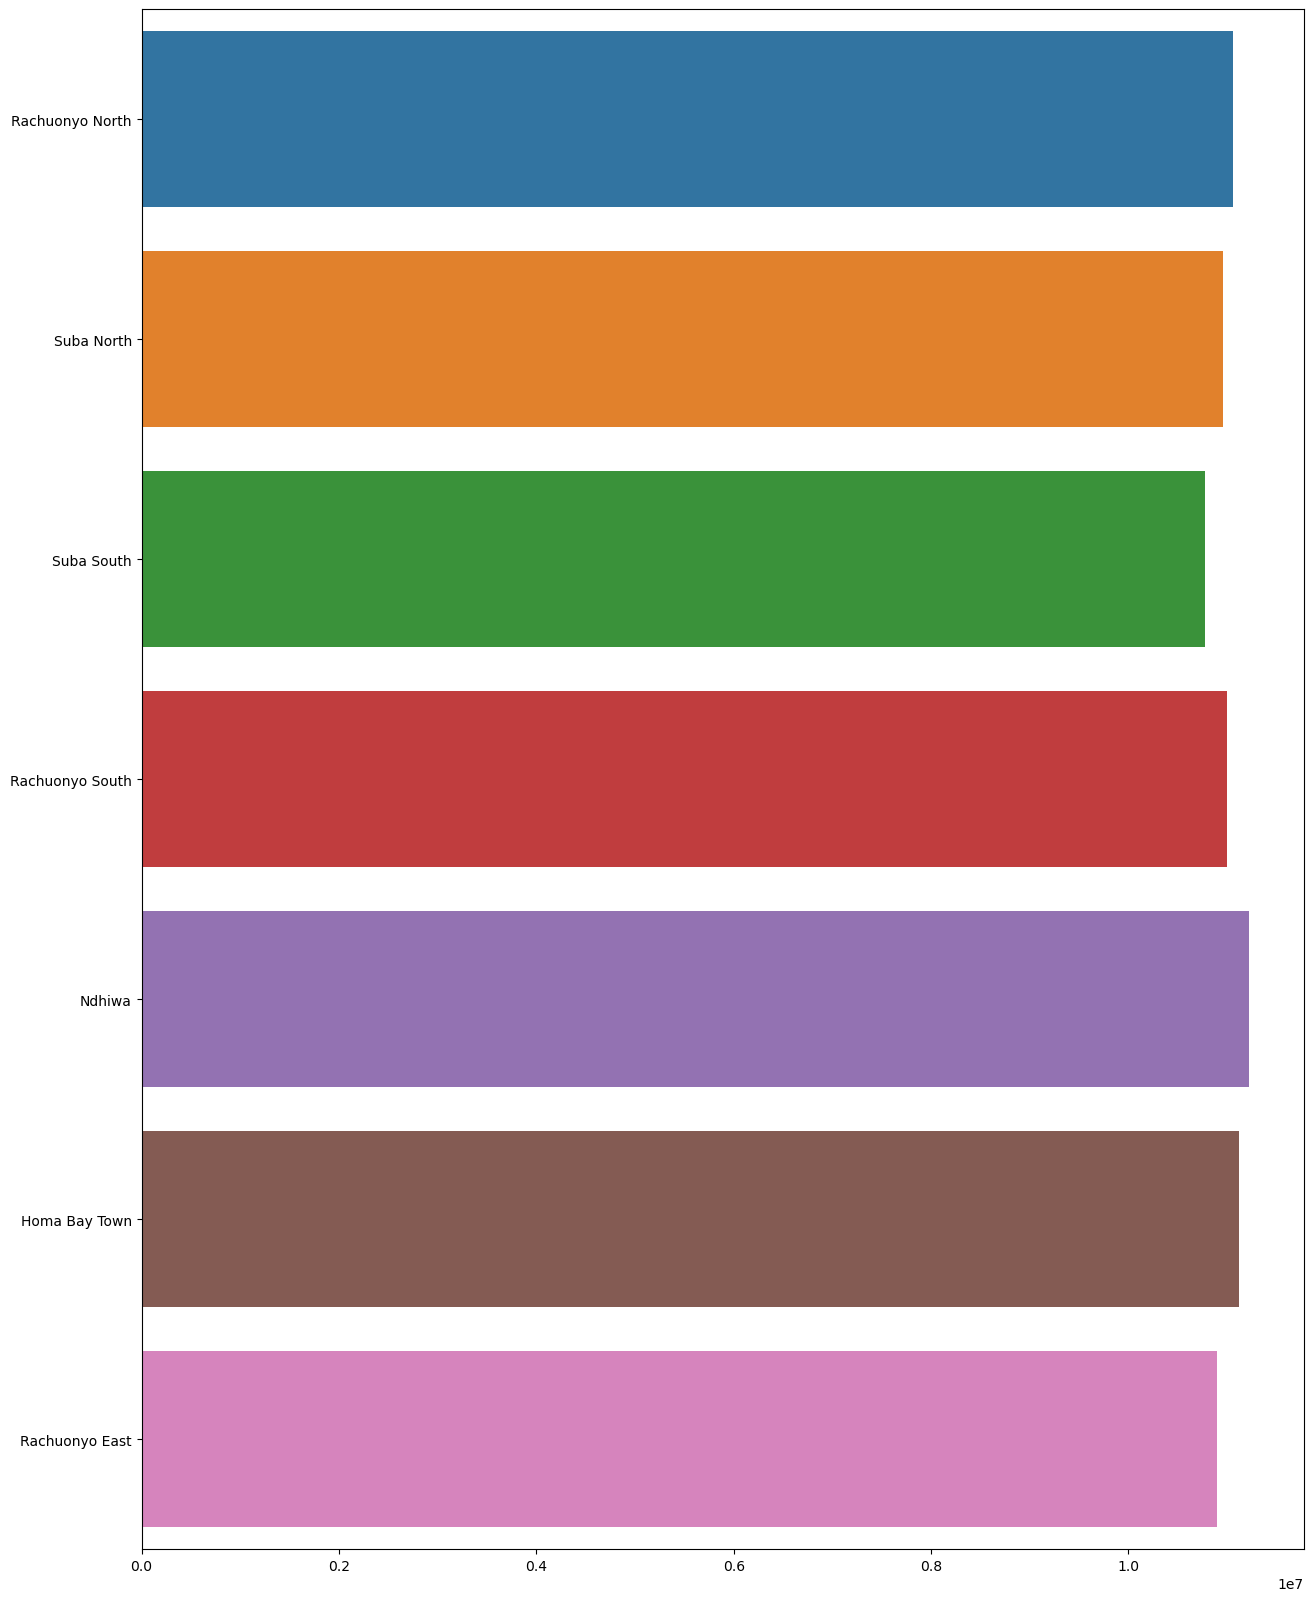

In [19]:
plt.figure(figsize=(15, 20))
sns.barplot(y=area, x=yield_per_area)
plt.savefig('dataanalysis/Areapng2.png')

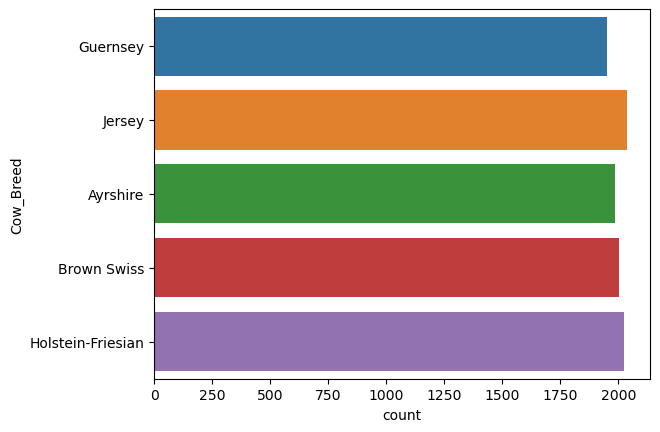

In [20]:
sns.countplot(y=df['Cow_Breed'])
plt.savefig('dataanalysis/CowBreed.png')

In [21]:
cow_Breed = df['Cow_Breed'].unique()
yield_per_cow_Breed = []
for cow in cow_Breed:
    yield_per_cow_Breed.append(df[df['Cow_Breed']==cow]['Yearly_Production'].sum())

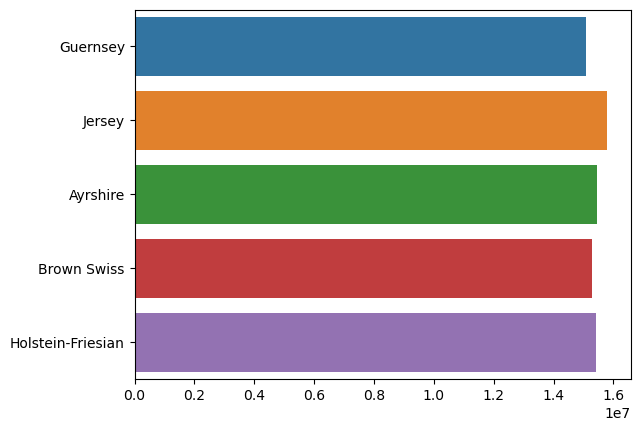

In [22]:
sns.barplot(y=cow_Breed,x=yield_per_cow_Breed)
plt.savefig('dataanalysis/yield_per_cow_Breed.png')

In [10]:
col = ['Average_Temperature_of_the_Area', 'Litres_of_water_Taken_by_the_cow_in_a_day','No_of_Calves', 'Cow_Breed', 'Feeding_Practices', 'Area', 'Yearly_Production']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
df.head(3)

,Average_Temperature_of_the_Area,Litres_of_water_Taken_by_the_cow_in_a_day,No_of_Calves,Cow_Breed,Feeding_Practices,Area,Yearly_Production
0,25,104,3,Guernsey,Zero-grazing,Rachuonyo North,8605
1,25,76,5,Jersey,Grazing,Suba North,7442
2,20,53,1,Ayrshire,Grazing,Rachuonyo North,7886


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
        transformers = [
            ('StandardScale', scale, [0, 1, 2,]),
            ('OHE', ohe, [3,4, 5]),
        ],
        remainder='passthrough'
)

In [15]:
##%%
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy = preprocesser.transform(X_test)

In [16]:
##%%
preprocesser.get_feature_names_out(col[:-1])

array(['StandardScale__Average_Temperature_of_the_Area',
       'StandardScale__Litres_of_water_Taken_by_the_cow_in_a_day',
       'StandardScale__No_of_Calves', 'OHE__Cow_Breed_Brown Swiss',
       'OHE__Cow_Breed_Guernsey', 'OHE__Cow_Breed_Holstein-Friesian',
       'OHE__Cow_Breed_Jersey', 'OHE__Feeding_Practices_Mixed',
       'OHE__Feeding_Practices_Zero-grazing', 'OHE__Area_Ndhiwa',
       'OHE__Area_Rachuonyo East', 'OHE__Area_Rachuonyo North',
       'OHE__Area_Rachuonyo South', 'OHE__Area_Suba North',
       'OHE__Area_Suba South'], dtype=object)

In [17]:
#linear regression
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,r2_score


models = {
    'lr':LinearRegression(),
    'lss':Lasso(),
    'Rid':Ridge(),
    'Dtr':DecisionTreeRegressor()
}
for name, md in models.items():
    md.fit(X_train_dummy,y_train)
    y_pred = md.predict(X_test_dummy)

    print(f"{name} : mae : {mean_absolute_error(y_test,y_pred)} score : {r2_score(y_test,y_pred)}")

lr : mae : 1459.88474445994 score : 0.5780035785286841
lss : mae : 1459.5334468875242 score : 0.5781469339359524
Rid : mae : 1459.8786173670444 score : 0.5780033932762363
Dtr : mae : 1086.7995 score : 0.7534596758006735


In [18]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([10040.,  7626.,  8171., ...,  5129., 10148.,  9335.])

In [19]:
def prediction(Average_Temperature_of_the_Area, Litres_of_water_Taken_by_the_cow_in_a_day,No_of_Calves, Cow_Breed, Feeding_Practices,Area):
    # Create an array of the input features
    features = np.array([[Average_Temperature_of_the_Area, Litres_of_water_Taken_by_the_cow_in_a_day,No_of_Calves, Cow_Breed, Feeding_Practices, Area]], dtype=object)
#'Average_Temperature_of_the_Area', 'Litres_of_water_Taken_by_the_cow_in_a_day','No_of_Calves', 'Cow_Breed', 'Feeding_Practices', 'Area'
    # Transform the features using the preprocessor
    transformed_features = preprocesser.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Average_Temperature_of_the_Area = 22
Litres_of_water_Taken_by_the_cow_in_a_day = 80.2
No_of_Calves = 3
Cow_Breed = 'Guernsey'
Feeding_Practices= 'Zero-grazing'
Area = 'Suba North'
result = prediction(Average_Temperature_of_the_Area, Litres_of_water_Taken_by_the_cow_in_a_day,No_of_Calves, Cow_Breed, Feeding_Practices, Area)

C:\Users\Lawter\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Lawter\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [20]:
result

array([11311.])

In [21]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocesser,open('preprocessor.pkl','wb'))

In [22]:
import sklearn
print(sklearn.__version__)

1.4.1.post1
